<h1></h1>
<h1 align = center><b>Goldsmiths University of London</b><h1>
<h4 align = center><b>Team Leader:</b> Rizza Marata (rmara001)<br><b>Student ID:</b> 33727980</b><h1>
<h4 align = center><b>Team Member:</b> Reena Maratas (rmara002)<br><b>Student ID: </b>33727927</b><h1>

***

<h1 align = center><b>Data Mining Assignment - Part 2</b><h1>

This task is based on a real credit risk data, and is to predict a response variable Y which represents a credit card default payment (Yes = 1, No = 0), using the 23 input variables as follows:

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
X2: Gender (1 = male; 2 = female).
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
X4: Marital status (1 = married; 2 = single; 3 = others).
X5: Age (year).
X6 - X11: History of past payment. One tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

Two datasets are provided to you: a training dataset in the creditdefault_train.csv file, and a test dataset in the creditdefault_test.csv file.

Using Python and any relevant libraries, you are required to build the best predictive model by tuning models using cross validation on the training dataset with each of the following algorithms discussed in this module: k-Nearest Neighbours, Decision Trees, Random Forest, Bagging, AdaBoost, and SVM. You may replace the AdaBoost algorithm with XGBoost algorithm, but do not use both of them. Out of the models tuned with all the above algorithms, select the best model and clearly justify your choice, and evaluate its performances on the test set.

## **I. Utilize Libraries and Packages**

In [63]:
# Import the pandas library
import pandas as pd

# Import the numpy library
import numpy as np

# Import the pyplot module from matplotlib library
import matplotlib.pyplot as plt

# Import seaborn for statistical data visualization
import seaborn as sns

from sklearn.preprocessing import StandardScaler

## **II. Examining and Visualizing Data**

### **a.)** Downloading the data

In [ ]:
# Download the test dataset from GitHub raw URL using wget command
!wget https://raw.githubusercontent.com/rmara001/Data-Mining-Assignment/main/data/creditdefault_test.csv

# Download the training dataset from GitHub raw URL using wget command
!wget https://raw.githubusercontent.com/rmara001/Data-Mining-Assignment/main/data/creditdefault_train.csv

### **b.)** Loading the data

In [ ]:
# Load the CSV files' dataframes
creditdefault_train_df = pd.read_csv('creditdefault_train.csv')
creditdefault_test_df = pd.read_csv('creditdefault_test.csv')

### **c.)** Changing Column Names

In [ ]:
# Original names of the columns
# Y, X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
# X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit
# X2: Gender (1 = male; 2 = female)
# Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)
# Marital status (1 = married; 2 = single; 3 = others)
# Age (year)
# X6 - X11: History of past payment. One tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above
# X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005
# X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005

# Defining new column names
column_names_mapping = {
    'Y': 'Credit Card Default',
    'X1': 'Amount of given credit (NT dollar)',
    'X2': 'Gender',
    'X3': 'Education',
    'X4': 'Marital status',
    'X5': 'Age',
    'X6': 'Repayment status in September, 2005',
    'X7': 'Repayment status in August, 2005',
    'X8': 'Repayment status in July, 2005',
    'X9': 'Repayment status in June, 2005',
    'X10': 'Repayment status in May, 2005',
    'X11': 'Repayment status in April, 2005',
    'X12': 'Amount of bill statement in September, 2005',
    'X13': 'Amount of bill statement in August, 2005',
    'X14': 'Amount of bill statement in July, 2005',
    'X15': 'Amount of bill statement in June, 2005',
    'X16': 'Amount of bill statement in May, 2005',
    'X17': 'Amount of bill statement in April, 2005',
    'X18': 'Amount of previous payment in September, 2005',
    'X19': 'Amount of previous payment in August, 2005',
    'X20': 'Amount of previous payment in July, 2005',
    'X21': 'Amount of previous payment in June, 2005',
    'X22': 'Amount of previous payment in May, 2005',
    'X23': 'Amount of previous payment in April, 2005',
}

# Rename the columns in both datasets
creditdefault_train_df.rename(columns=column_names_mapping, inplace=True)
creditdefault_test_df.rename(columns=column_names_mapping, inplace=True)

### **c.)** Examining the structure of the data

In [ ]:
# Display the first 5 rows of the train dataframe for the credit default dataset
print("Train Dataframe:")
display(creditdefault_train_df.head())

# Print a line break with a separator for clarity
print("\n" + "-"*40 + "\n")

# Display the first 5 rows of the test dataframe for the credit default dataset
print("Test Dataframe:")
display(creditdefault_test_df.head())

Train Dataframe:


,Credit Card Default,Amount of given credit (NT dollar),Gender,Education,Marital status,Age,"Repayment status in September, 2005","Repayment status in August, 2005","Repayment status in July, 2005","Repayment status in June, 2005",...,"Amount of bill statement in July, 2005","Amount of bill statement in June, 2005","Amount of bill statement in May, 2005","Amount of bill statement in April, 2005","Amount of previous payment in September, 2005","Amount of previous payment in August, 2005","Amount of previous payment in July, 2005","Amount of previous payment in June, 2005","Amount of previous payment in May, 2005","Amount of previous payment in April, 2005"
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,0,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
2,0,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
3,0,50000,1,1,2,37,0,0,0,0,...,57608,19394,19619,20024,2500,1815,657,1000,1000,800
4,0,500000,1,1,2,29,0,0,0,0,...,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770



----------------------------------------

Test Dataframe:


,Credit Card Default,Amount of given credit (NT dollar),Gender,Education,Marital status,Age,"Repayment status in September, 2005","Repayment status in August, 2005","Repayment status in July, 2005","Repayment status in June, 2005",...,"Amount of bill statement in July, 2005","Amount of bill statement in June, 2005","Amount of bill statement in May, 2005","Amount of bill statement in April, 2005","Amount of previous payment in September, 2005","Amount of previous payment in August, 2005","Amount of previous payment in July, 2005","Amount of previous payment in June, 2005","Amount of previous payment in May, 2005","Amount of previous payment in April, 2005"
0,1,120000,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
1,0,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
2,0,140000,2,3,1,28,0,0,2,0,...,12108,12211,11793,3719,3329,0,432,1000,1000,1000
3,0,20000,1,3,2,35,-2,-2,-2,-2,...,0,0,13007,13912,0,0,0,13007,1122,0
4,0,200000,2,3,2,34,0,0,2,0,...,5535,2513,1828,3731,2306,12,50,300,3738,66


In [ ]:
# Display information about the training dataframe for the credit default dataset
print("Train Dataframe Info:")
creditdefault_train_df.info()

# Print a line break with a separator for clarity
print("\n" + "-"*40 + "\n")

# Display information about the testing dataframe for the credit default dataset
print("Test Dataframe Info:")
creditdefault_test_df.info()

Train Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype
---  ------                                         --------------  -----
 0   Credit Card Default                            15000 non-null  int64
 1   Amount of given credit (NT dollar)             15000 non-null  int64
 2   Gender                                         15000 non-null  int64
 3   Education                                      15000 non-null  int64
 4   Marital status                                 15000 non-null  int64
 5   Age                                            15000 non-null  int64
 6   Repayment status in September, 2005            15000 non-null  int64
 7   Repayment status in August, 2005               15000 non-null  int64
 8   Repayment status in July, 2005                 15000 non-null  int64
 9   Repayment status in June, 2005                 150

In [ ]:
# Display statistical summary of the training dataframe for the credit default dataset
print("Training Dataframe Statistical Summary:")
display(creditdefault_train_df.describe())

# Print a line break with a separator for clarity
print("\n" + "-"*40 + "\n")

# Display statistical summary of the testing dataframe for the credit default dataset
print("Testing Dataframe Statistical Summary:")
display(creditdefault_test_df.describe())

Training Dataframe Statistical Summary:


,Credit Card Default,Amount of given credit (NT dollar),Gender,Education,Marital status,Age,"Repayment status in September, 2005","Repayment status in August, 2005","Repayment status in July, 2005","Repayment status in June, 2005",...,"Amount of bill statement in July, 2005","Amount of bill statement in June, 2005","Amount of bill statement in May, 2005","Amount of bill statement in April, 2005","Amount of previous payment in September, 2005","Amount of previous payment in August, 2005","Amount of previous payment in July, 2005","Amount of previous payment in June, 2005","Amount of previous payment in May, 2005","Amount of previous payment in April, 2005"
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,...,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000
mean,0.221200,167450.245333,1.604867,1.850000,1.556200,35.367933,-0.020467,-0.130933,-0.163000,-0.214467,...,47117.562067,43077.445667,40272.922667,38708.685867,5615.960000,5.822059e+03,4942.959000,4997.328867,4798.478400,5226.421267
std,0.415069,130109.925023,0.488896,0.786686,0.522743,9.154118,1.125048,1.198451,1.202606,1.180578,...,69182.434940,64016.907786,60503.339354,59212.425410,15551.708028,2.155675e+04,13629.034736,16499.349511,15463.948485,18099.851948
min,0.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-34041.000000,-170000.000000,-46627.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2733.500000,2392.750000,1800.000000,1200.000000,1000.000000,8.330000e+02,390.000000,290.000000,204.000000,80.000000
50%,0.000000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,20165.000000,19090.500000,18178.000000,17177.000000,2113.000000,2.014000e+03,1809.000000,1500.000000,1500.000000,1500.000000
75%,0.000000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,60263.250000,54599.500000,50134.750000,49122.750000,5023.250000,5.000000e+03,4571.500000,4048.500000,4019.500000,4000.000000
max,1.000000,800000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,8.000000,8.000000,8.000000,...,855086.000000,706864.000000,587067.000000,568638.000000,493358.000000,1.227082e+06,380478.000000,528897.000000,426529.000000,528666.000000



----------------------------------------

Testing Dataframe Statistical Summary:


,Credit Card Default,Amount of given credit (NT dollar),Gender,Education,Marital status,Age,"Repayment status in September, 2005","Repayment status in August, 2005","Repayment status in July, 2005","Repayment status in June, 2005",...,"Amount of bill statement in July, 2005","Amount of bill statement in June, 2005","Amount of bill statement in May, 2005","Amount of bill statement in April, 2005","Amount of previous payment in September, 2005","Amount of previous payment in August, 2005","Amount of previous payment in July, 2005","Amount of previous payment in June, 2005","Amount of previous payment in May, 2005","Amount of previous payment in April, 2005"
count,15000.000000,15000.00000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,...,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000
mean,0.221200,167518.40000,1.602600,1.856267,1.547533,35.603067,-0.012933,-0.136600,-0.169400,-0.226867,...,4.690875e+04,43448.452267,40349.879267,39034.834933,5711.201000,6.020268e+03,5508.404000,4654.824867,4800.296867,5204.583867
std,0.415069,129388.71212,0.489376,0.794008,0.521177,9.280067,1.122579,1.195953,1.191133,1.157593,...,6.951809e+04,64648.862167,61091.551799,59895.370421,17516.924518,2.443534e+04,20835.555914,14784.664100,15090.894847,17449.721214
min,0.000000,10000.00000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-1.572640e+05,-50616.000000,-81334.000000,-150953.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,50000.00000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2.639000e+03,2290.500000,1729.500000,1307.750000,980.750000,8.327500e+02,390.750000,300.000000,286.750000,156.750000
50%,0.000000,140000.00000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,2.004050e+04,19012.500000,18025.000000,16924.000000,2100.000000,2.004000e+03,1800.000000,1500.000000,1519.000000,1500.000000
75%,0.000000,240000.00000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,6.000650e+04,54407.000000,50247.250000,49327.000000,5001.000000,5.000000e+03,4500.000000,4001.500000,4041.250000,4007.000000
max,1.000000,1000000.00000,2.000000,6.000000,3.000000,79.000000,8.000000,7.000000,8.000000,8.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,417990.000000,527143.000000


In [ ]:
# Display the shape of the training dataframe for the credit default dataset
print(f"Shape of Training Dataframe: {creditdefault_train_df.shape}")

# Print a line break with a separator for clarity
print("\n" + "-"*40 + "\n")

# Display the shape of the testing dataframe for the credit default dataset
print(f"Shape of Testing Dataframe: {creditdefault_test_df.shape}")

Shape of Training Dataframe: (15000, 24)

----------------------------------------

Shape of Testing Dataframe: (15000, 24)


### **d.)** Data Visualisation of Train and Test Dataframes

In [ ]:
# Print the data types of the columns in the training dataframe
print("Training Dataframe Column Types:")
print(creditdefault_train_df.dtypes)

# This prints a line break with a separator for clarity
print("\n" + "-"*40 + "\n")

# Print the data types of the columns in the testing dataframe
print("Testing Dataframe Column Types:")
print(creditdefault_test_df.dtypes)

Training Dataframe Column Types:
Credit Card Default                              int64
Amount of given credit (NT dollar)               int64
Gender                                           int64
Education                                        int64
Marital status                                   int64
Age                                              int64
Repayment status in September, 2005              int64
Repayment status in August, 2005                 int64
Repayment status in July, 2005                   int64
Repayment status in June, 2005                   int64
Repayment status in May, 2005                    int64
Repayment status in April, 2005                  int64
Amount of bill statement in September, 2005      int64
Amount of bill statement in August, 2005         int64
Amount of bill statement in July, 2005           int64
Amount of bill statement in June, 2005           int64
Amount of bill statement in May, 2005            int64
Amount of bill statement in Apri

In [ ]:
# Change the training dataframe's data types to float64
creditdefault_train_df = creditdefault_train_df.astype('float64')

# Change the training dataframe's data types to float64
creditdefault_test_df = creditdefault_test_df.astype('float64')

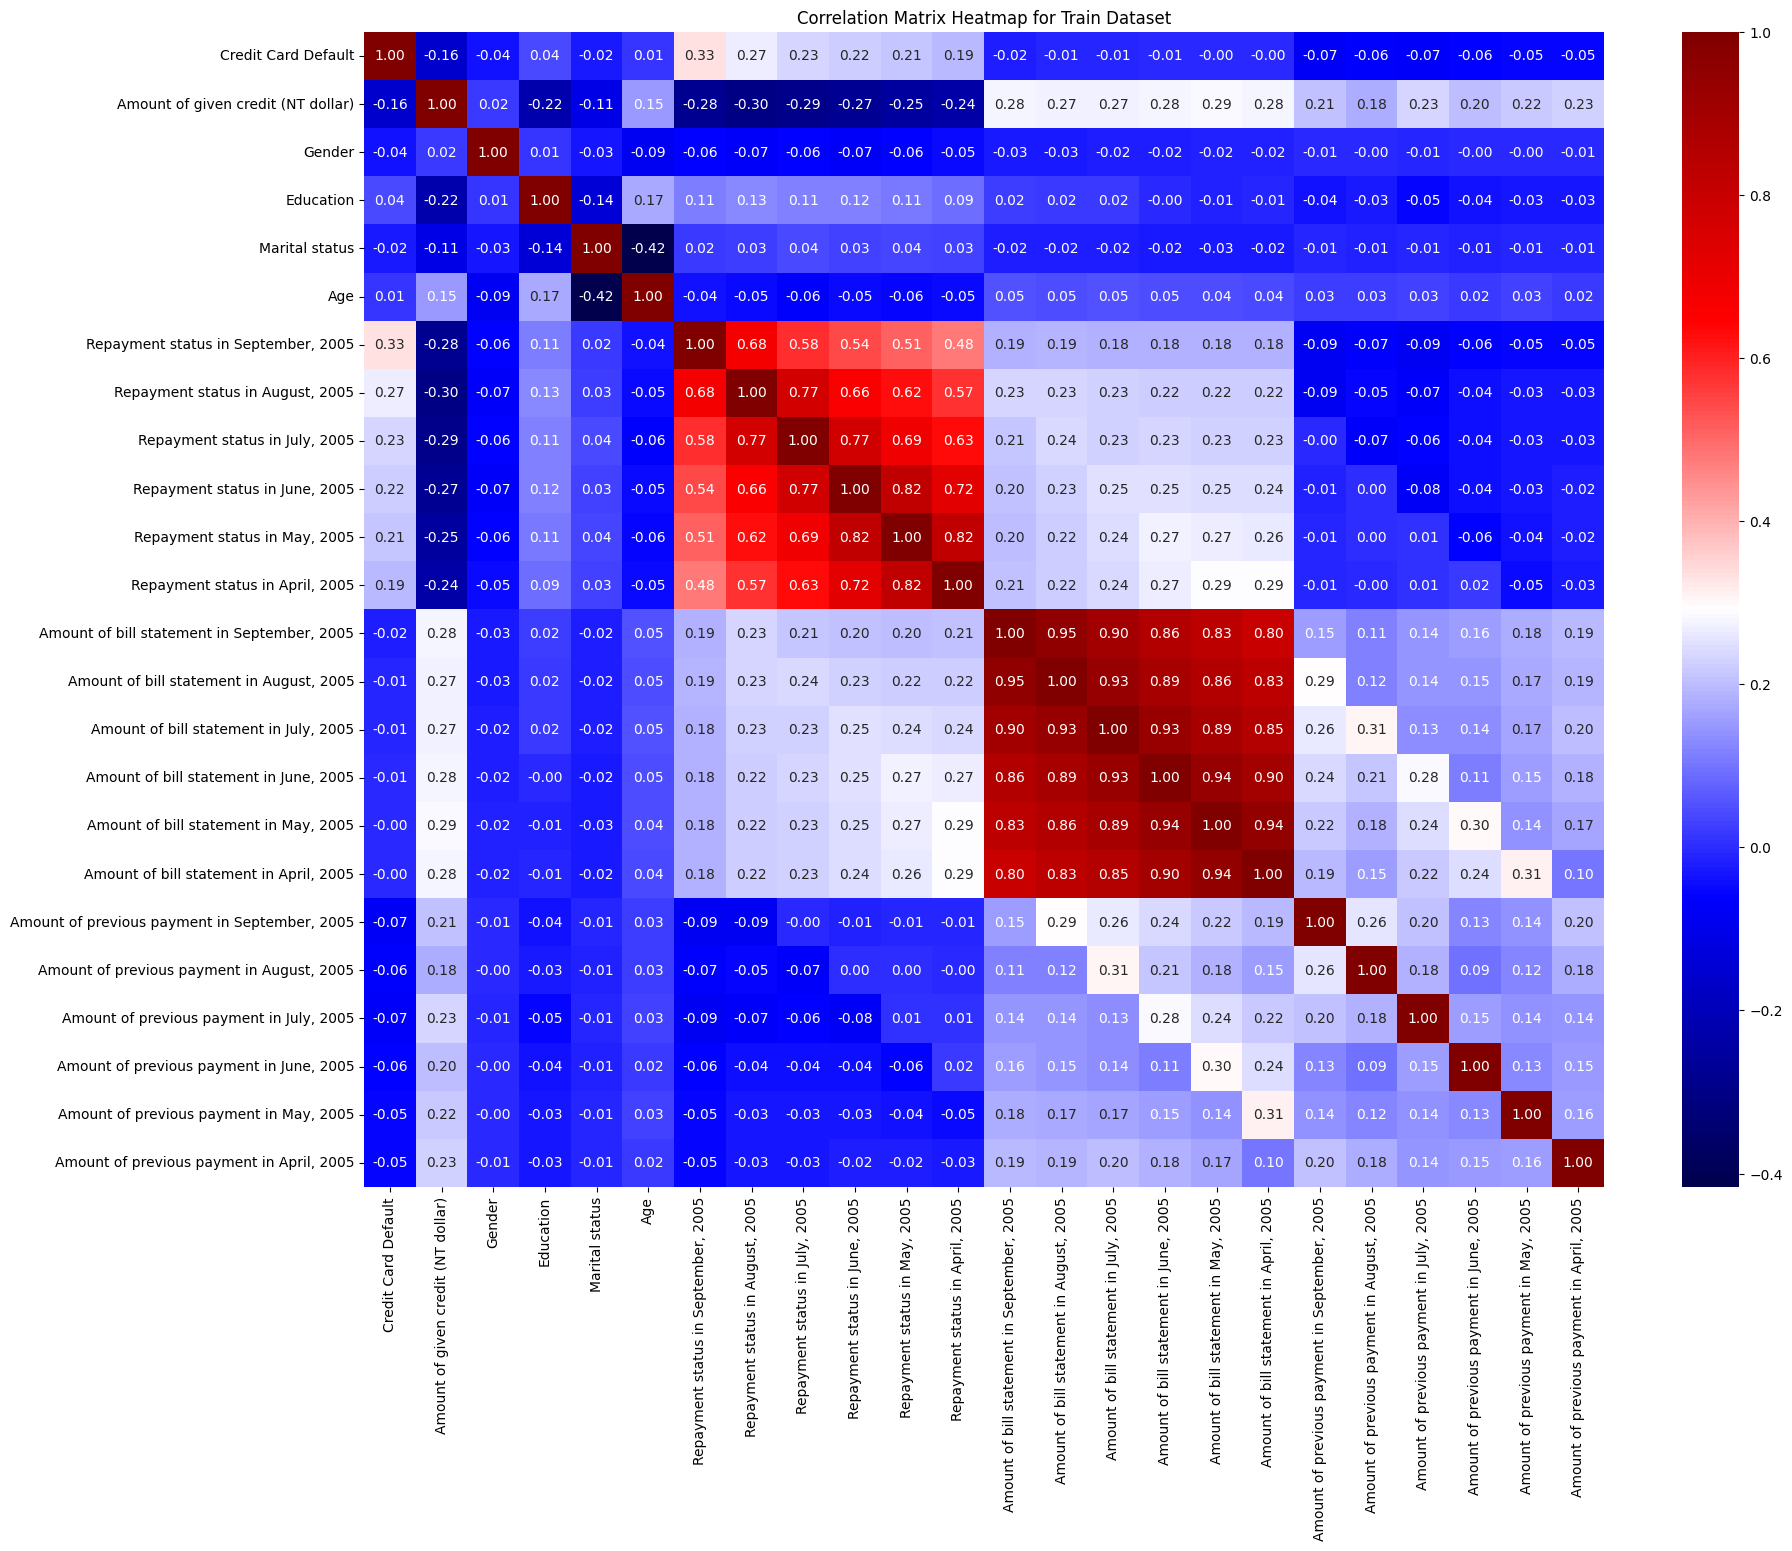

In [27]:
# Create correlation matrix for the train dataset
corr_matrix = creditdefault_train_df.corr()

# Plot the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='seismic', cbar=True)
plt.title('Correlation Matrix Heatmap for Train Dataset')
plt.show()

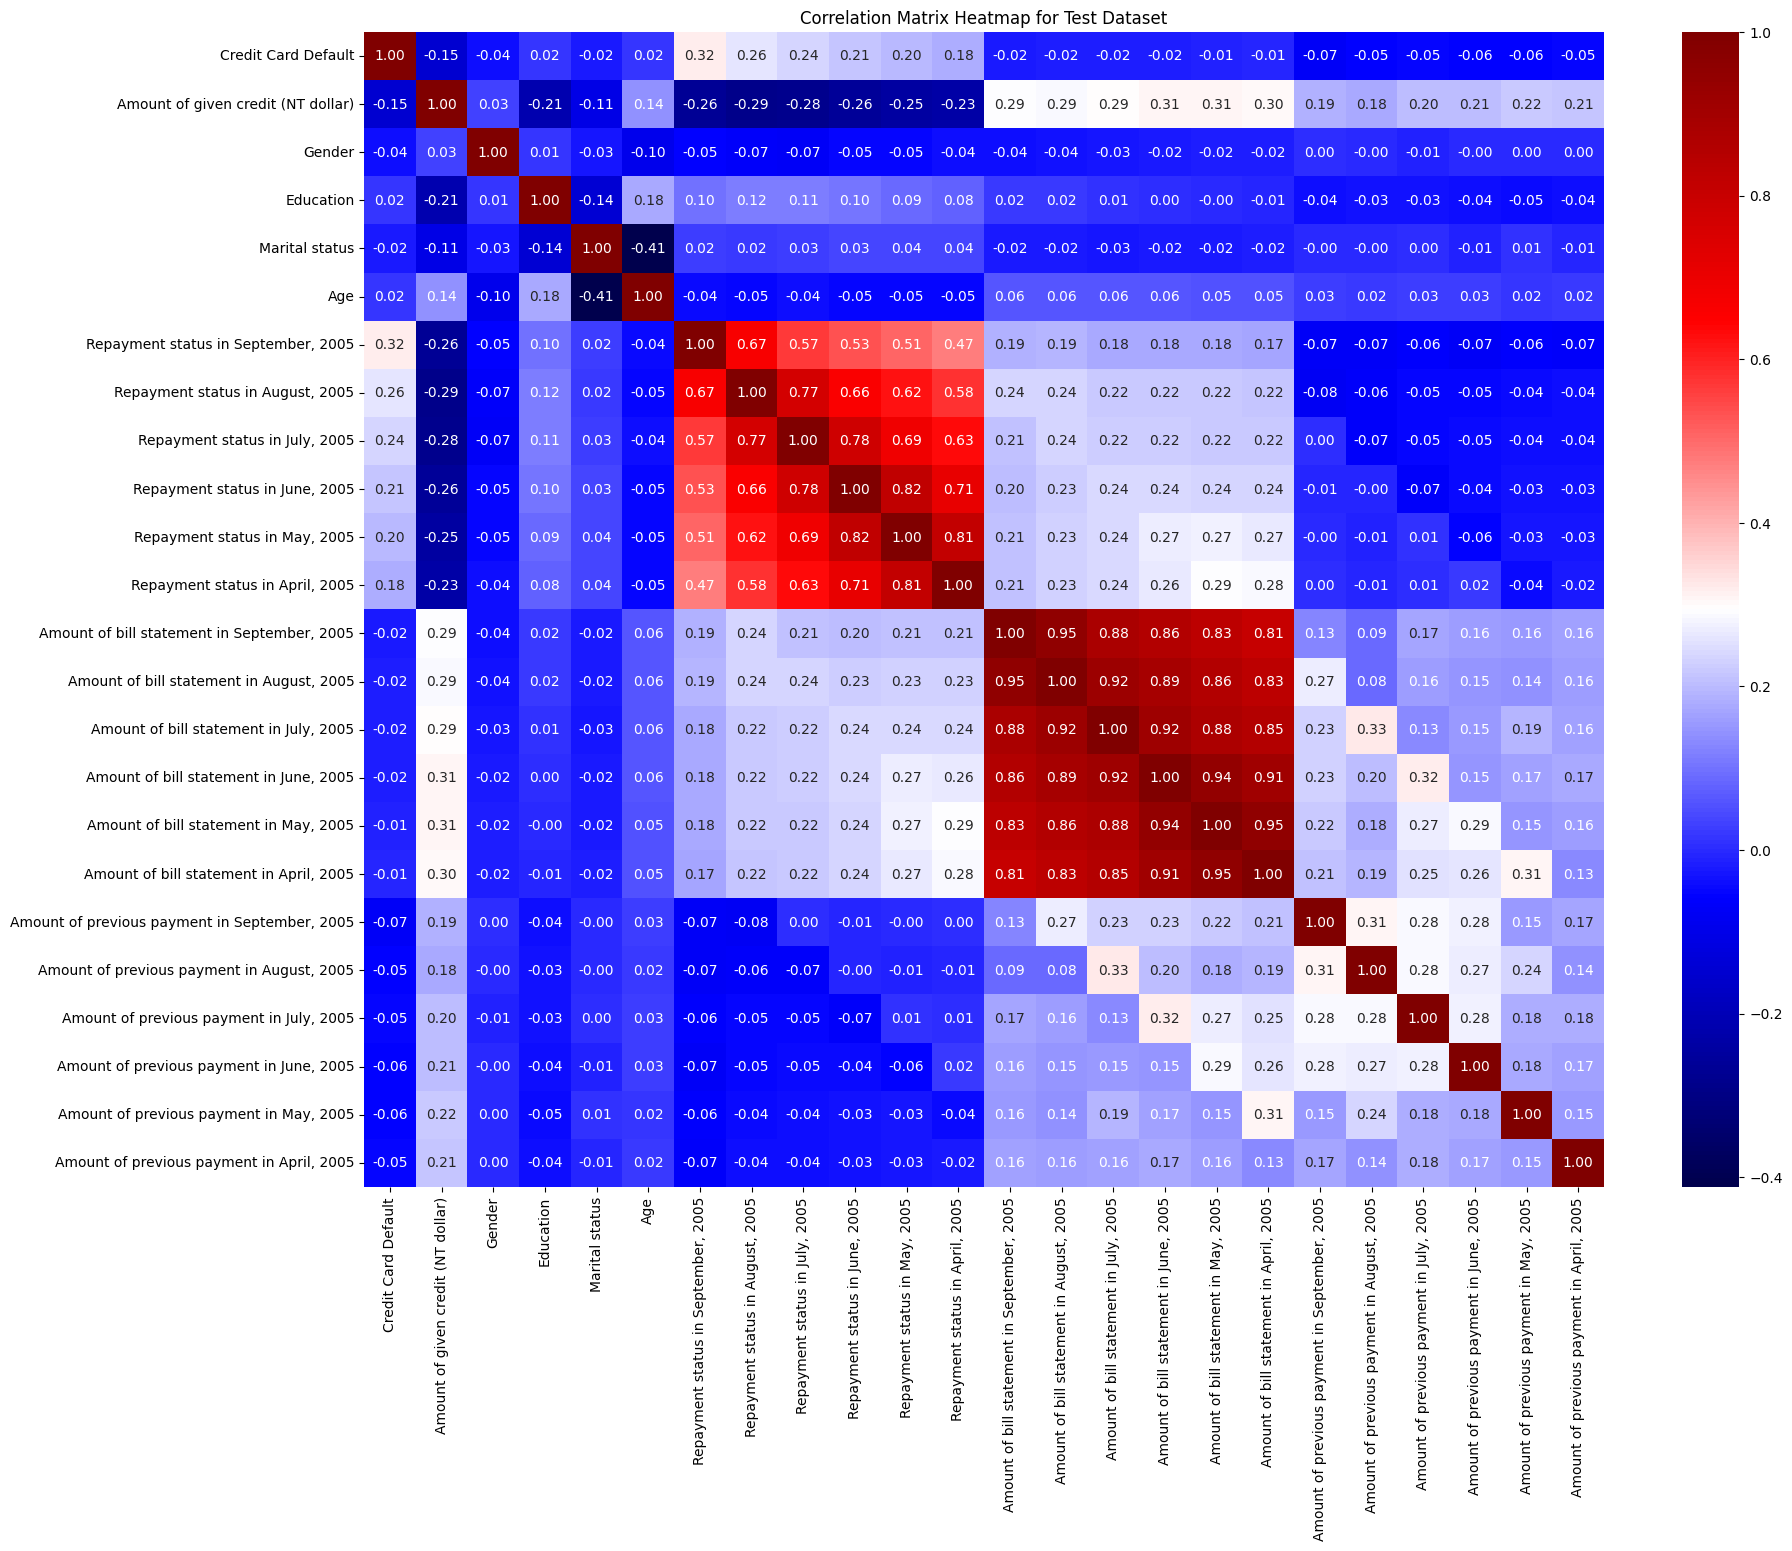

In [28]:
# Create correlation matrix for the test dataset
corr_matrix_test = creditdefault_test_df.corr()

# Plot the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix_test, annot=True, fmt=".2f", cmap='seismic', cbar=True)
plt.title('Correlation Matrix Heatmap for Test Dataset')
plt.show()

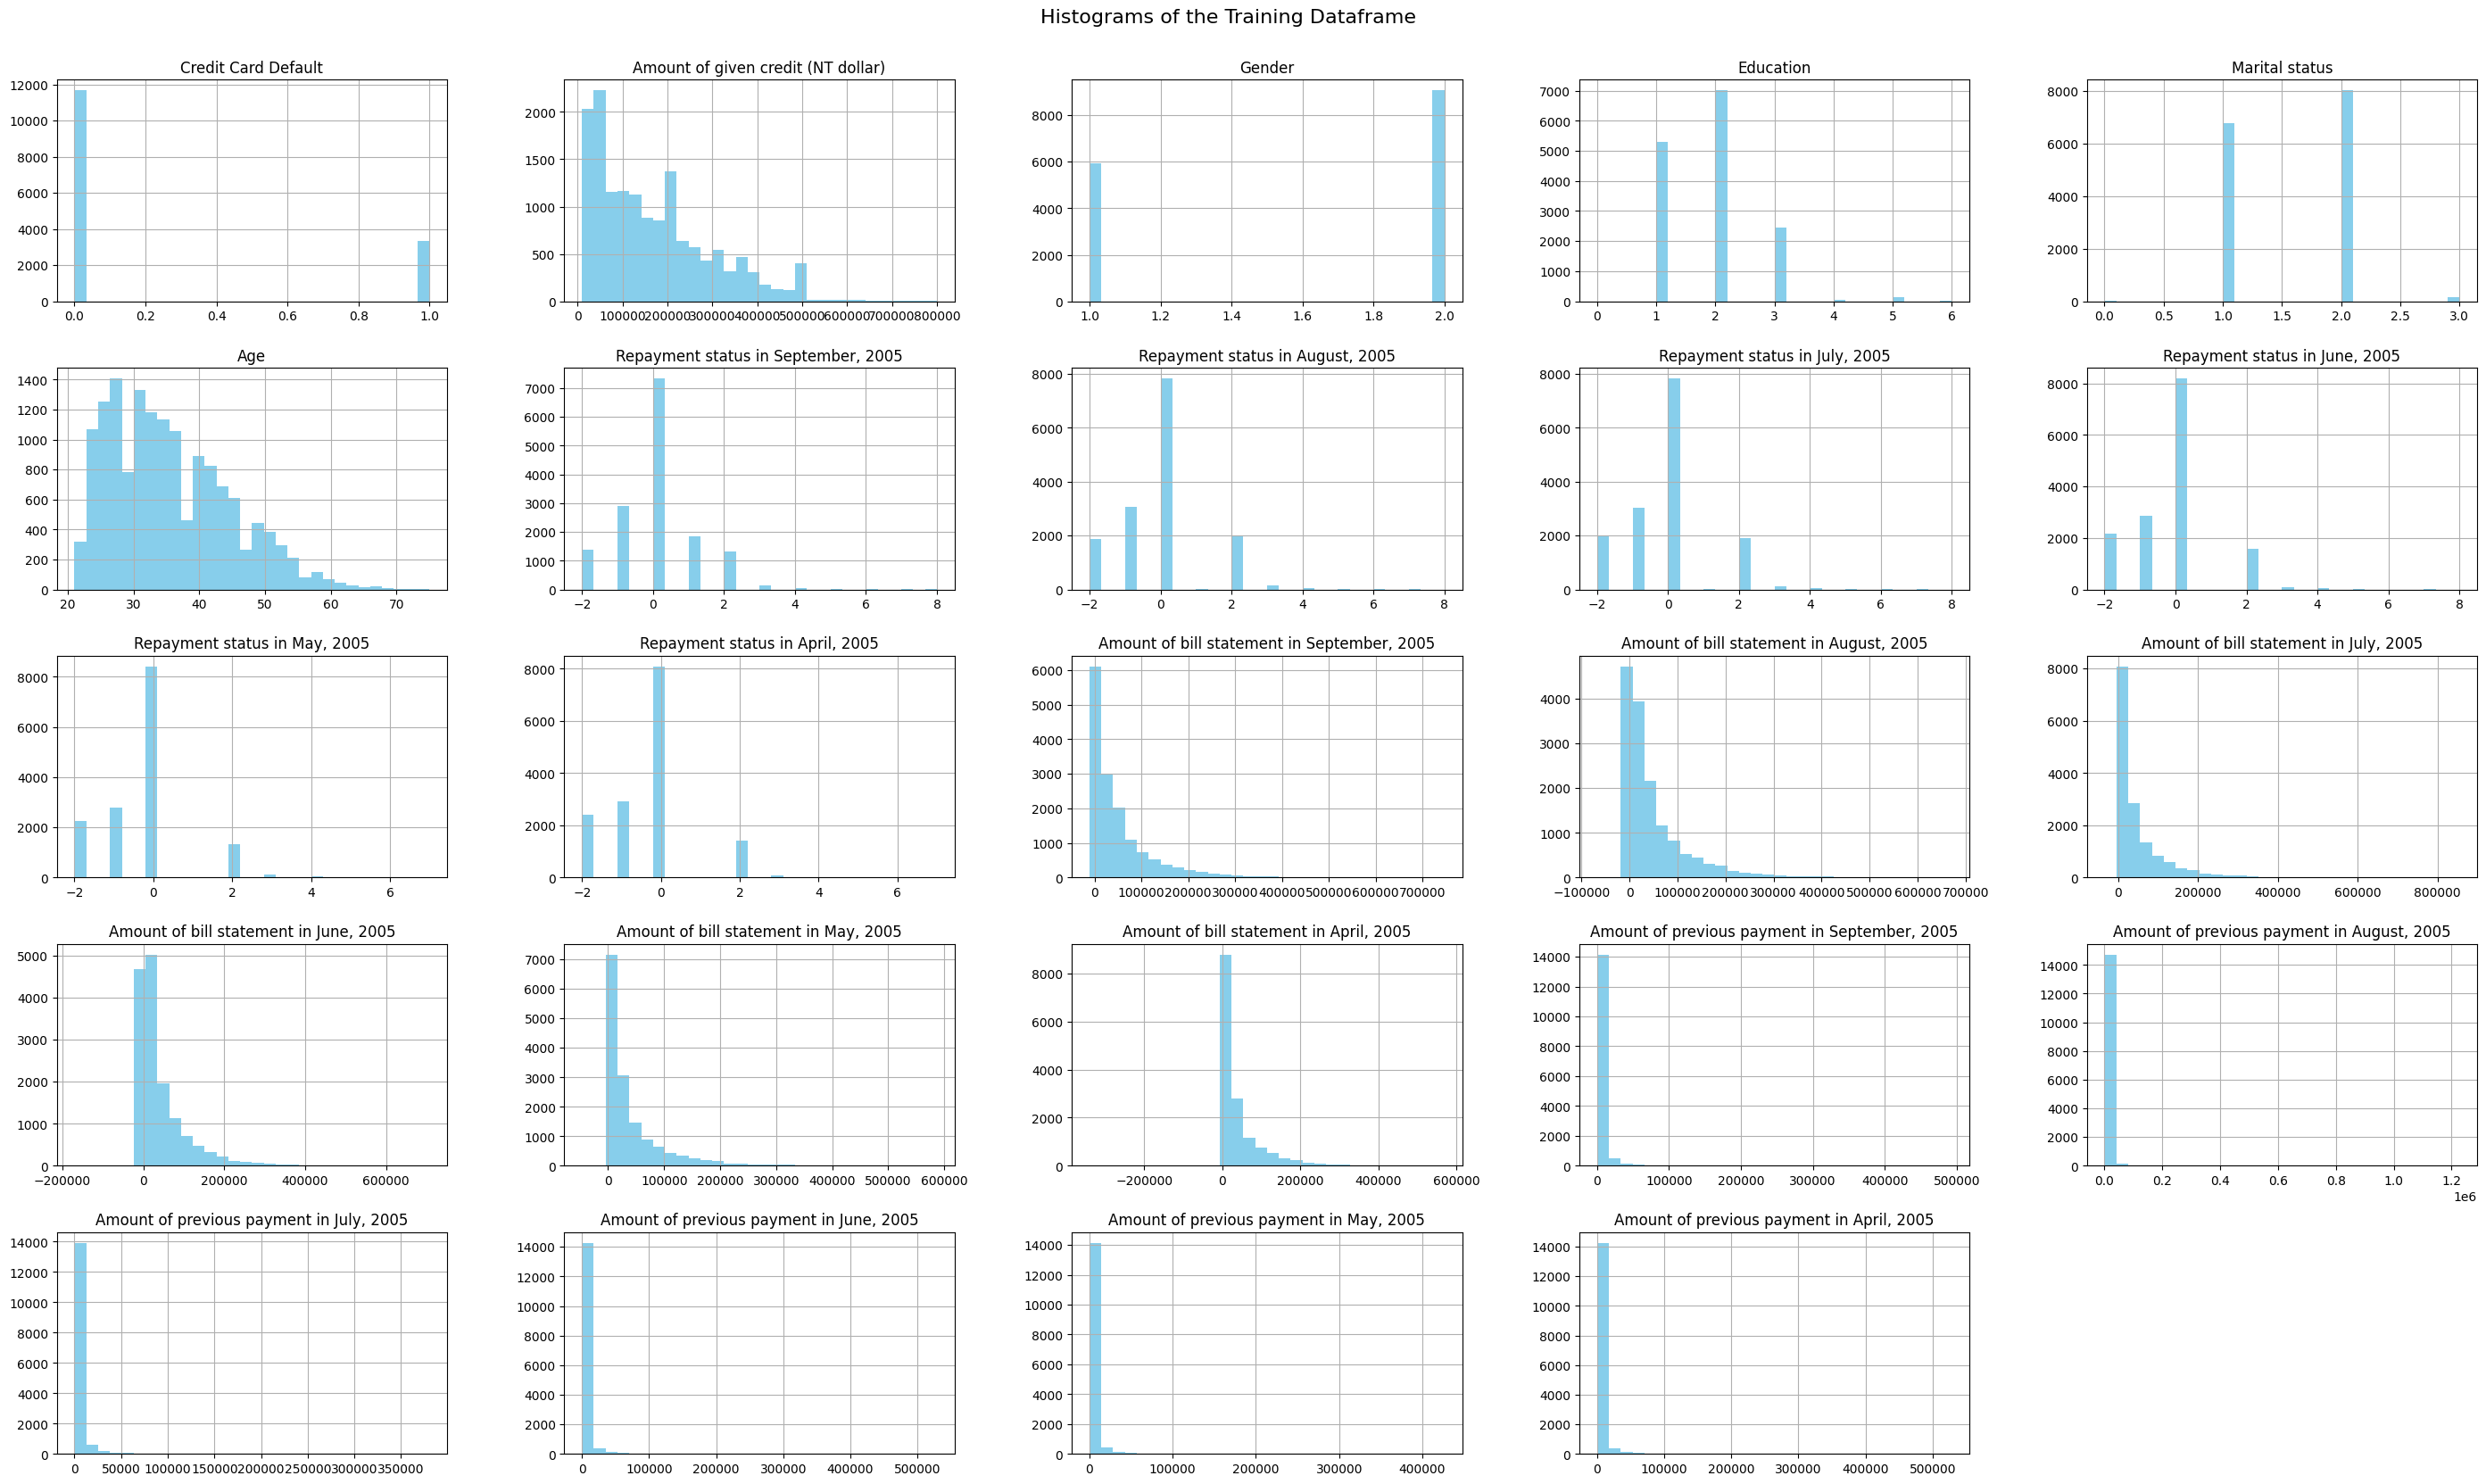

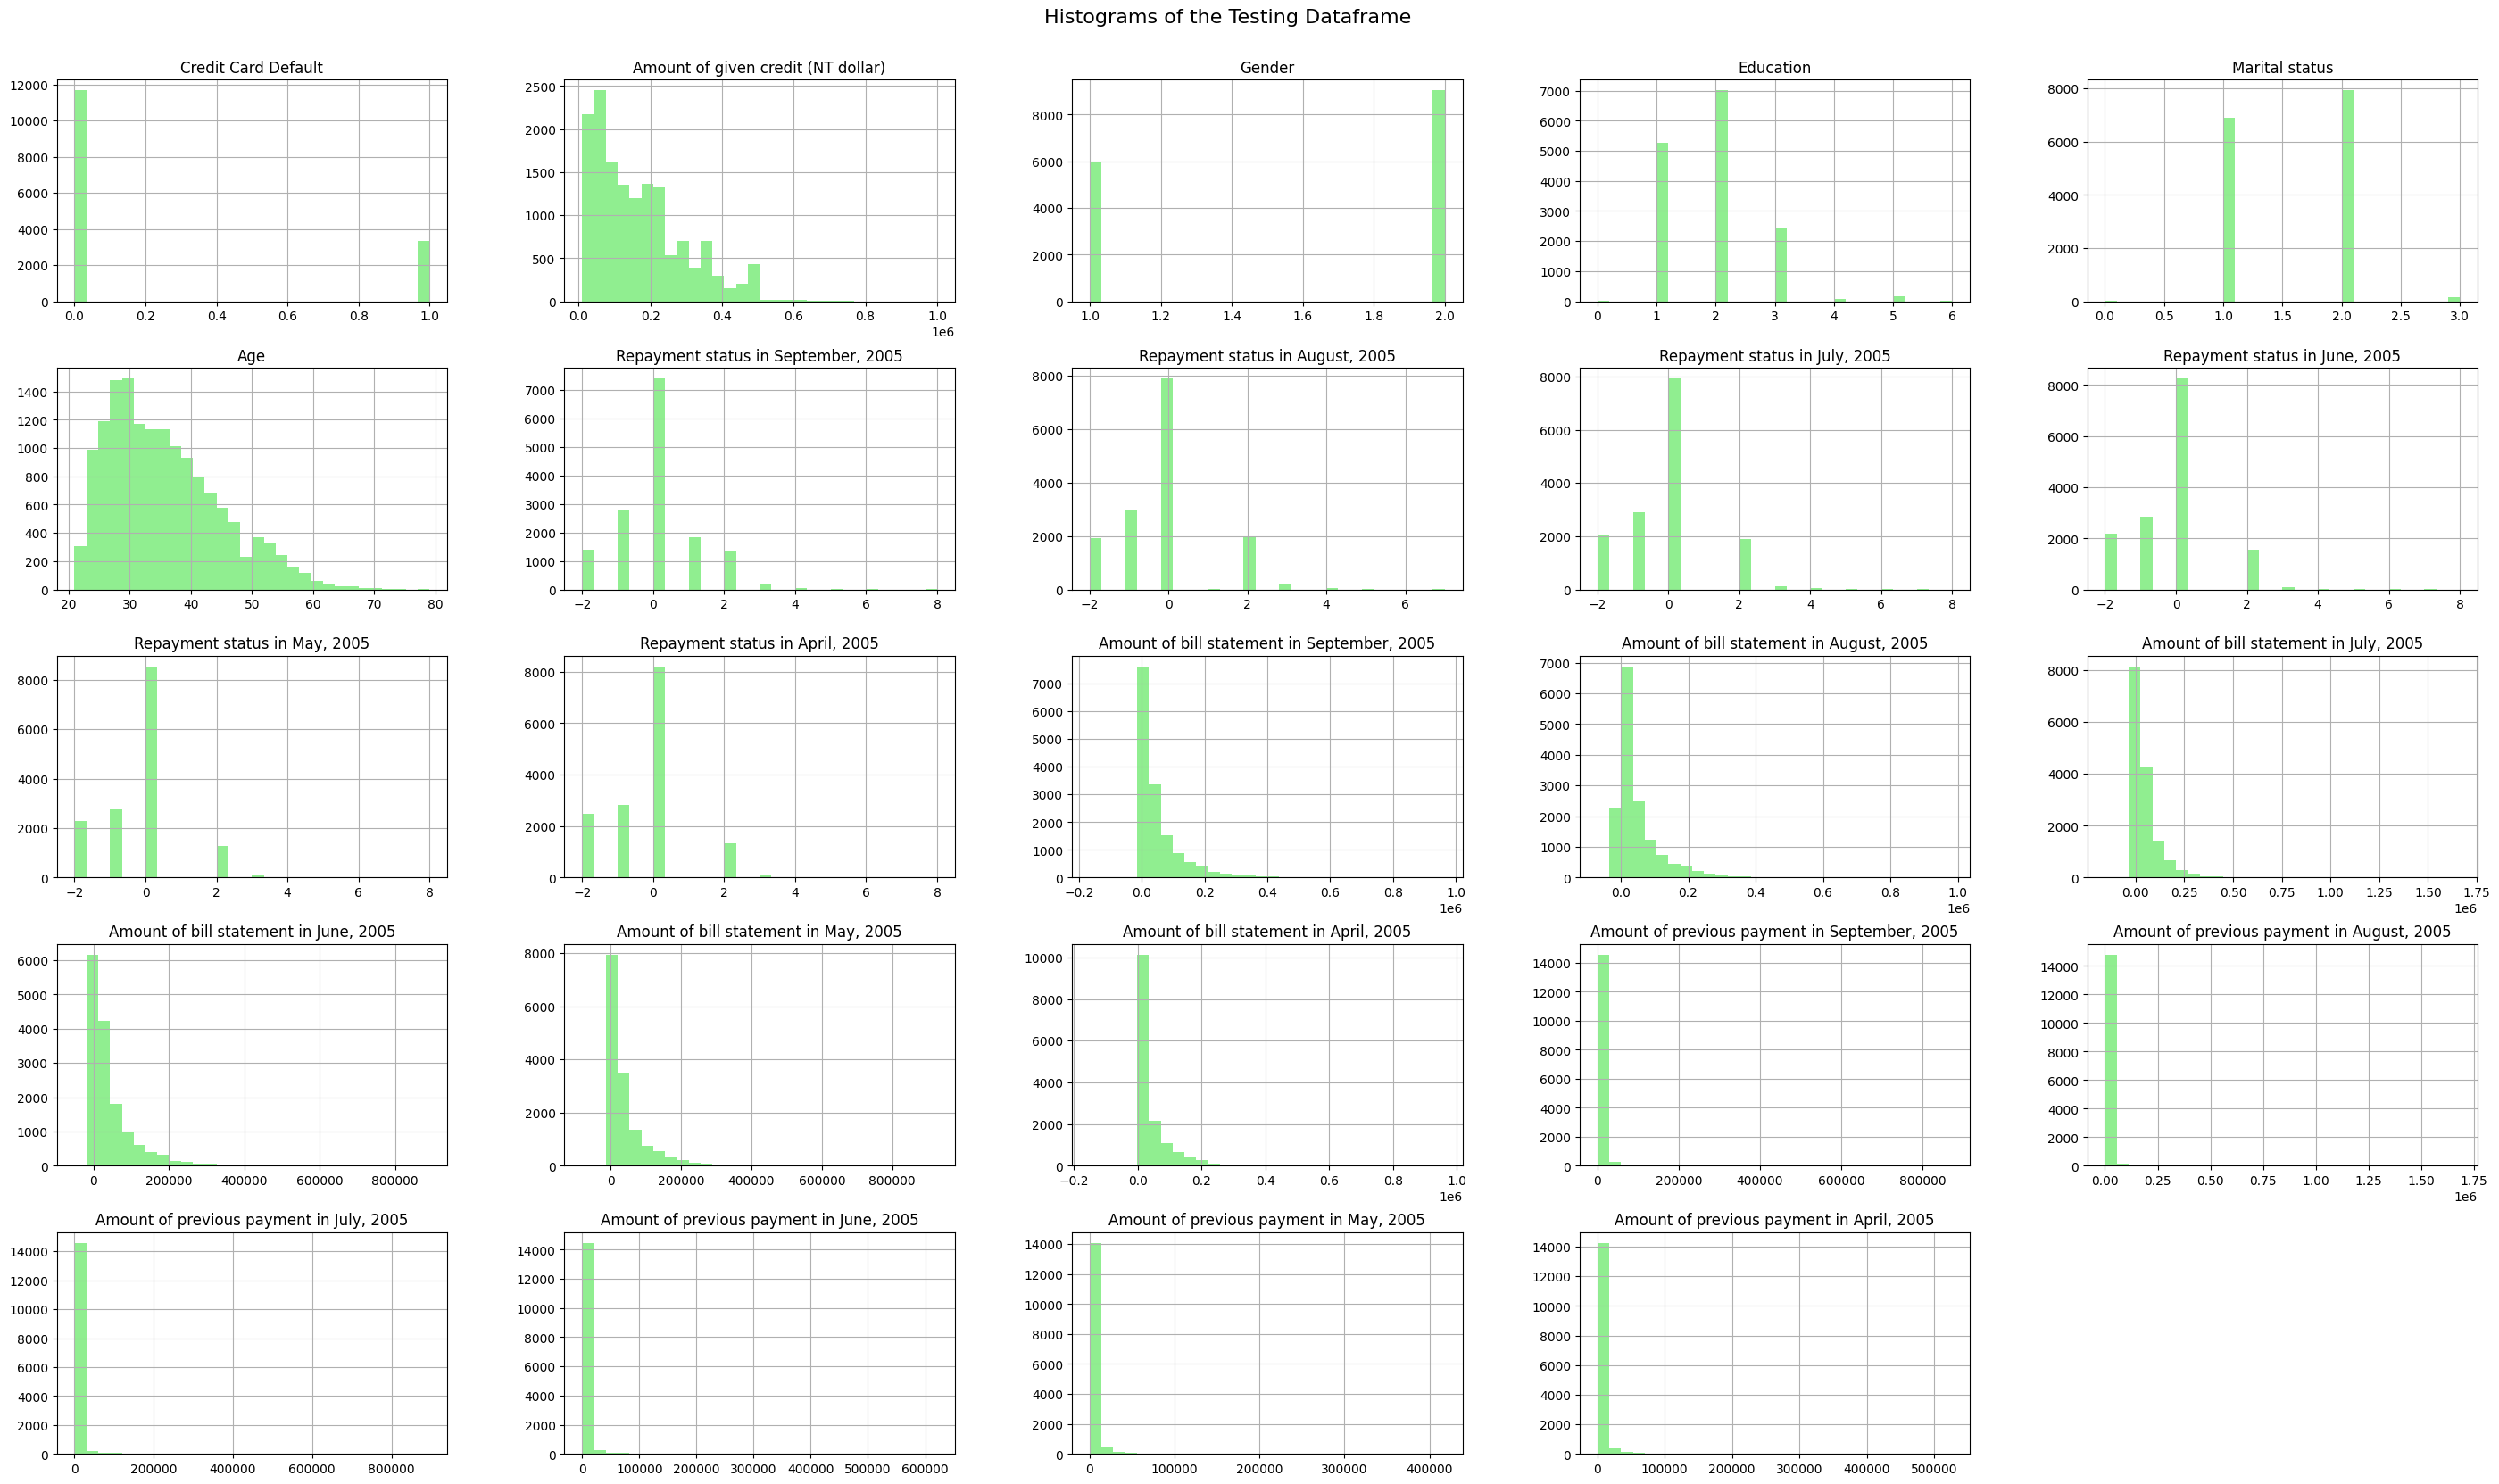

In [25]:
# Generate histograms for the data within the training dataset
creditdefault_train_df.hist(bins=30, figsize=(35, 20), color='skyblue')
plt.suptitle('Histograms of the Training Dataframe', fontsize=16, y=0.92)
plt.show()

# Separator for clarity
print("\n")

# Generate histograms for the data within the testing dataset
creditdefault_test_df.hist(bins=30, figsize=(35, 20), color='lightgreen')
plt.suptitle('Histograms of the Testing Dataframe', fontsize=16, y=0.92)
plt.show()

## **III. Data Cleaning**

### **a.)** Checking if there are any missing values in the data

In [33]:
# Function to check and report any missing values in dataframes
def check_missing_values(df, df_name):
    """
    Checks, prints the missing values, and indicates if any missing values are present in a dataframe.

    Parameters:
    - df: pandas dataframe to check for missing values.
    - df_name: String, name of the dataframe for display purposes.
    """
    missing_values = df.isnull().sum()
    # Check if there are any missing values in the dataframe
    any_missing = df.isnull().any().any()

    print(f"Missing values in {df_name}:")
    print(missing_values)
    print(f"\nAre there any missing values in {df_name}: {any_missing}")

# Check for missing values in the training dataframe
check_missing_values(creditdefault_train_df, "Training Dataframe")

# This prints a line break with a separator for clarity
print("\n" + "-"*40 + "\n")

# Check for missing values in the testing dataframe
check_missing_values(creditdefault_test_df, "Testing Dataframe")

Missing values in Training Dataframe:
Credit Card Default                              0
Amount of given credit (NT dollar)               0
Gender                                           0
Education                                        0
Marital status                                   0
Age                                              0
Repayment status in September, 2005              0
Repayment status in August, 2005                 0
Repayment status in July, 2005                   0
Repayment status in June, 2005                   0
Repayment status in May, 2005                    0
Repayment status in April, 2005                  0
Amount of bill statement in September, 2005      0
Amount of bill statement in August, 2005         0
Amount of bill statement in July, 2005           0
Amount of bill statement in June, 2005           0
Amount of bill statement in May, 2005            0
Amount of bill statement in April, 2005          0
Amount of previous payment in September, 200

### **b.)** Correlation Matrix

In [35]:
corr_matrix = creditdefault_train_df.corr()
print(corr_matrix.columns)

Index(['Credit Card Default', 'Amount of given credit (NT dollar)', 'Gender',
       'Education', 'Marital status', 'Age',
       'Repayment status in September, 2005',
       'Repayment status in August, 2005', 'Repayment status in July, 2005',
       'Repayment status in June, 2005', 'Repayment status in May, 2005',
       'Repayment status in April, 2005',
       'Amount of bill statement in September, 2005',
       'Amount of bill statement in August, 2005',
       'Amount of bill statement in July, 2005',
       'Amount of bill statement in June, 2005',
       'Amount of bill statement in May, 2005',
       'Amount of bill statement in April, 2005',
       'Amount of previous payment in September, 2005',
       'Amount of previous payment in August, 2005',
       'Amount of previous payment in July, 2005',
       'Amount of previous payment in June, 2005',
       'Amount of previous payment in May, 2005',
       'Amount of previous payment in April, 2005'],
      dtype='object')


In [48]:
# Extract correlations with 'Credit Card Default' and sort them
sorted_correlations = corr_matrix.loc[:, "Credit Card Default"].sort_values(ascending=False)

print(sorted_correlations)

Credit Card Default                              1.000000
Repayment status in September, 2005              0.331649
Repayment status in August, 2005                 0.268786
Repayment status in July, 2005                   0.234252
Repayment status in June, 2005                   0.221039
Repayment status in May, 2005                    0.211088
Repayment status in April, 2005                  0.192512
Education                                        0.038325
Age                                              0.011005
Amount of bill statement in April, 2005         -0.001679
Amount of bill statement in May, 2005           -0.003687
Amount of bill statement in June, 2005          -0.005166
Amount of bill statement in July, 2005          -0.010390
Amount of bill statement in August, 2005        -0.010794
Amount of bill statement in September, 2005     -0.018290
Marital status                                  -0.024420
Gender                                          -0.038752
Amount of prev

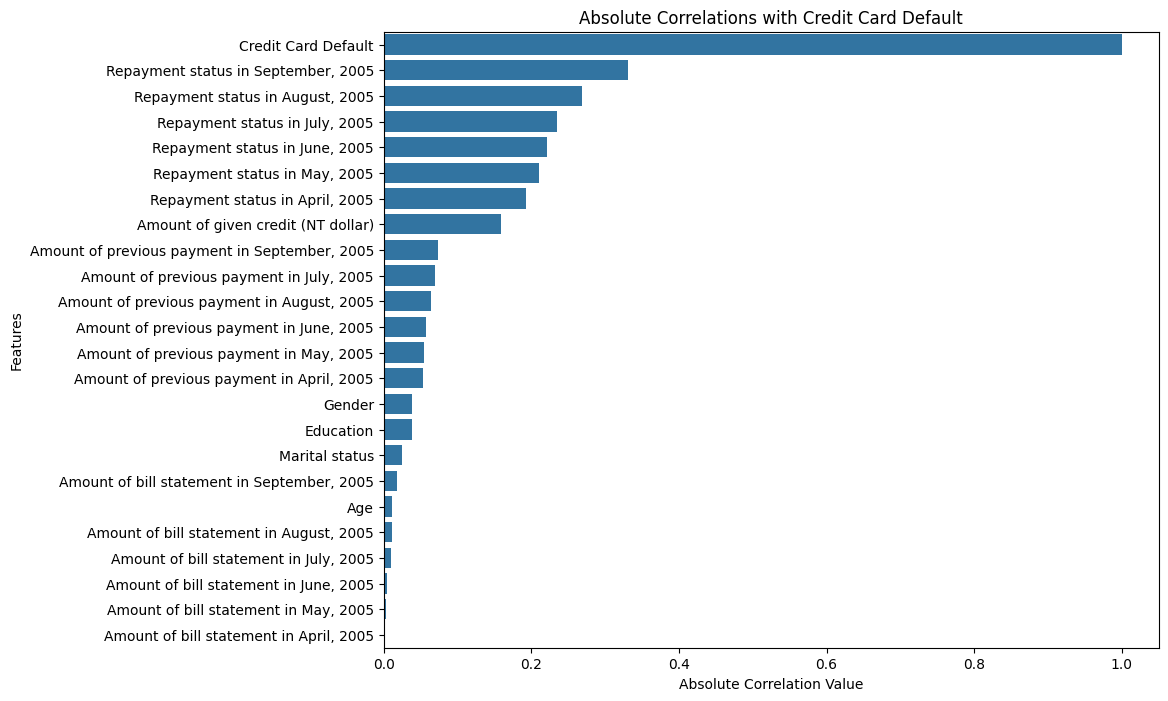

In [53]:
# Compute the correlation matrix
corr_matrix = creditdefault_train_df.corr()

# Calculate the absolute value of correlations with 'Credit Card Default'
abs_correlations = corr_matrix["Credit Card Default"].abs().sort_values(ascending=False)

# Plot the absolute correlations as a bar plot
plt.figure(figsize=(10, 8))
sns.barplot(y=abs_correlations.index, x=abs_correlations.values)
plt.title('Absolute Correlations with Credit Card Default')
plt.xlabel('Absolute Correlation Value')
plt.ylabel('Features')
plt.show()

In [57]:
# Display the sorted absolute correlations with 'Credit Card Default'
abs_correlations

Credit Card Default                              1.000000
Repayment status in September, 2005              0.331649
Repayment status in August, 2005                 0.268786
Repayment status in July, 2005                   0.234252
Repayment status in June, 2005                   0.221039
Repayment status in May, 2005                    0.211088
Repayment status in April, 2005                  0.192512
Amount of given credit (NT dollar)               0.159296
Amount of previous payment in September, 2005    0.074303
Amount of previous payment in July, 2005         0.069627
Amount of previous payment in August, 2005       0.063889
Amount of previous payment in June, 2005         0.056760
Amount of previous payment in May, 2005          0.054227
Amount of previous payment in April, 2005        0.053284
Gender                                           0.038752
Education                                        0.038325
Marital status                                   0.024420
Amount of bill

### **c.)** Scaling Numerical Features in Credit Default Data


In [83]:
# List of numerical columns to scale
num_columns = ['Amount of given credit (NT dollar)', 'Age',
               'Amount of bill statement in September, 2005', 'Amount of bill statement in August, 2005',
               'Amount of bill statement in July, 2005', 'Amount of bill statement in June, 2005',
               'Amount of bill statement in May, 2005', 'Amount of bill statement in April, 2005',
               'Amount of previous payment in September, 2005', 'Amount of previous payment in August, 2005',
               'Amount of previous payment in July, 2005', 'Amount of previous payment in June, 2005',
               'Amount of previous payment in May, 2005', 'Amount of previous payment in April, 2005']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit on the training data and transform both training and test data
creditdefault_train_df[num_columns] = scaler.fit_transform(creditdefault_train_df[num_columns])
creditdefault_test_df[num_columns] = scaler.transform(creditdefault_test_df[num_columns])

# Display the first few rows of the transformed training data to verify
print("Transformed Training Data:")
display(creditdefault_train_df.head())

# This prints a line break with a separator for clarity
print("\n" + "-"*40 + "\n")

# Display the first few rows of the transformed test data to verify
print("\nTransformed Test Data:")
display(creditdefault_test_df.head())

Transformed Training Data:


,Credit Card Default,Amount of given credit (NT dollar),Gender,Education,Marital status,Age,"Repayment status in September, 2005","Repayment status in August, 2005","Repayment status in July, 2005","Repayment status in June, 2005",...,"Amount of bill statement in July, 2005","Amount of bill statement in June, 2005","Amount of bill statement in May, 2005","Amount of bill statement in April, 2005","Amount of previous payment in September, 2005","Amount of previous payment in August, 2005","Amount of previous payment in July, 2005","Amount of previous payment in June, 2005","Amount of previous payment in May, 2005","Amount of previous payment in April, 2005"
0,1.876378,-1.133312,0.808243,0.190680,-1.064039,-1.241880,1.795954,1.778132,-0.696012,-0.665403,...,-0.671126,-0.672930,-0.665654,-0.653748,-0.361127,-0.238126,-0.362691,-0.302890,-0.310311,-0.288765
1,-0.532942,-0.902730,0.808243,0.190680,-1.064039,0.178294,0.018192,0.109256,0.135544,0.181669,...,0.031417,-0.230626,-0.187003,-0.154731,-0.232520,-0.176427,-0.274640,-0.236219,-0.241180,-0.233514
2,-0.532942,-0.902730,-1.237252,0.190680,-1.064039,2.363176,-0.870688,0.109256,-0.696012,0.181669,...,-0.163090,-0.345818,-0.349198,-0.330646,-0.232520,1.431569,0.371061,0.242604,-0.265755,-0.251249
3,-0.532942,-0.902730,-1.237252,-1.080518,0.849012,0.178294,0.018192,0.109256,0.135544,0.181669,...,0.151639,-0.369968,-0.341380,-0.315564,-0.200368,-0.185890,-0.314483,-0.242280,-0.245643,-0.244564
4,-0.532942,2.555999,-1.237252,-1.080518,0.849012,-0.695659,0.018192,0.109256,0.135544,0.181669,...,5.751499,7.804067,7.317693,7.350650,3.175580,1.585540,2.425567,0.923805,0.578883,0.472041



----------------------------------------


Transformed Test Data:


,Credit Card Default,Amount of given credit (NT dollar),Gender,Education,Marital status,Age,"Repayment status in September, 2005","Repayment status in August, 2005","Repayment status in July, 2005","Repayment status in June, 2005",...,"Amount of bill statement in July, 2005","Amount of bill statement in June, 2005","Amount of bill statement in May, 2005","Amount of bill statement in April, 2005","Amount of previous payment in September, 2005","Amount of previous payment in August, 2005","Amount of previous payment in July, 2005","Amount of previous payment in June, 2005","Amount of previous payment in May, 2005","Amount of previous payment in April, 2005"
0,1.876378,-0.364706,0.808243,0.190680,0.849012,-1.023391,-0.870688,1.778132,0.135544,0.181669,...,-0.642317,-0.621817,-0.608547,-0.598673,-0.361127,-0.223699,-0.289315,-0.242280,-0.310311,-0.178263
1,-0.532942,-0.595288,0.808243,0.190680,0.849012,-0.149439,0.018192,0.109256,0.135544,0.181669,...,-0.485090,-0.449060,-0.418585,-0.391142,-0.263514,-0.200503,-0.289315,-0.242280,-0.245643,-0.012510
2,-0.532942,-0.210984,0.808243,1.461878,-1.064039,-0.804903,0.018192,0.109256,1.798654,0.181669,...,-0.506064,-0.482177,-0.470732,-0.590938,-0.147060,-0.270090,-0.330993,-0.242280,-0.245643,-0.233514
3,-0.532942,-1.133312,-1.237252,1.461878,0.849012,-0.040195,-1.759569,-1.559620,-1.527567,-1.512474,...,-0.681085,-0.672930,-0.450667,-0.418789,-0.361127,-0.270090,-0.362691,0.485470,-0.237753,-0.288765
4,-0.532942,0.250180,0.808243,1.461878,0.849012,-0.149439,0.018192,0.109256,1.798654,0.181669,...,-0.601077,-0.633673,-0.635439,-0.590735,-0.212843,-0.269533,-0.359022,-0.284707,-0.068580,-0.285118


### **d.)** Feature and Target Sets for Credit Default Analysis

In [89]:
# Split into features and targets
X_train = creditdefault_train_df.iloc[:, 1:]  # Selects all columns except the first
y_train = creditdefault_train_df.iloc[:, 0]   # Selects the first column
X_test = creditdefault_test_df.iloc[:, 1:]    # Selects all columns except the first
y_test = creditdefault_test_df.iloc[:, 0]     # Selects the first column

# Print the shape of the split datasets
print("Training Features Shape:", X_train.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Testing Target Shape:", y_test.shape)

Training Features Shape: (15000, 23)
Training Target Shape: (15000,)
Testing Features Shape: (15000, 23)
Testing Target Shape: (15000,)


## **IV. **

In [90]:
# Initializing Storage for Best Model Selection
best_models = {}

### **c.)** k-Nearest Neighbours
